# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
iowa = pd.read_csv('/users/nick/desktop/Iowa_Liquor_sales_sample_10pct.csv')
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


## Explore/clean the data

In [2]:
# Cleaning up data. Getting rid of dollar signs, spaces in column names, parentheses in column names.

iowa.columns = iowa.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
iowa['Date'] = pd.to_datetime(iowa.Date)
iowa['Sale_Dollars'] = (iowa['Sale_Dollars'].replace( '[\$,)]','', regex=True ).astype(float))
iowa['State_Bottle_Cost'] = (iowa['State_Bottle_Cost'].replace( '[\$,)]','', regex=True ).astype(float))
iowa['State_Bottle_Retail'] = (iowa['State_Bottle_Retail'].replace( '[\$,)]','', regex=True ).astype(float))
iowa.head(5)

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume_Sold_Liters,Volume_Sold_Gallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [3]:
'''This will make visualizing the data easier. From what I understand of dummy variables, making date
ordinal would be suspect. But since I will not be using date as a feature variable, this will not matter. Just a way 
to play with/more easily sort the data, see what's happening.'''

iowa['Day'] = iowa.Date.dt.weekday
iowa['Week'] = iowa.Date.dt.week
iowa['Month'] = iowa.Date.dt.month
iowa['Year'] = iowa.Date.dt.year

In [4]:
# Want to get a sense of what's missing.

iowa.isnull().sum()

Date                      0
Store_Number              0
City                      0
Zip_Code                  0
County_Number          1077
County                 1077
Category                 68
Category_Name           632
Vendor_Number             0
Item_Number               0
Item_Description          0
Bottle_Volume_ml          0
State_Bottle_Cost         0
State_Bottle_Retail       0
Bottles_Sold              0
Sale_Dollars              0
Volume_Sold_Liters        0
Volume_Sold_Gallons       0
Day                       0
Week                      0
Month                     0
Year                      0
dtype: int64

In [ ]:
'''I'm going to go through the exercise of filling in missing values, even though I won't end up using the features
with missing values in my model.'''

In [5]:
city_county_num = dict(zip(iowa.City, iowa.County_Number))
iowa['County_Number'] = iowa['City'].map(city_county_num)

In [6]:
city_county = dict(zip(iowa.City, iowa.County))
iowa['County'] = iowa['City'].map(city_county)

## Graphs

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114eb2350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1160ce510>]], dtype=object)

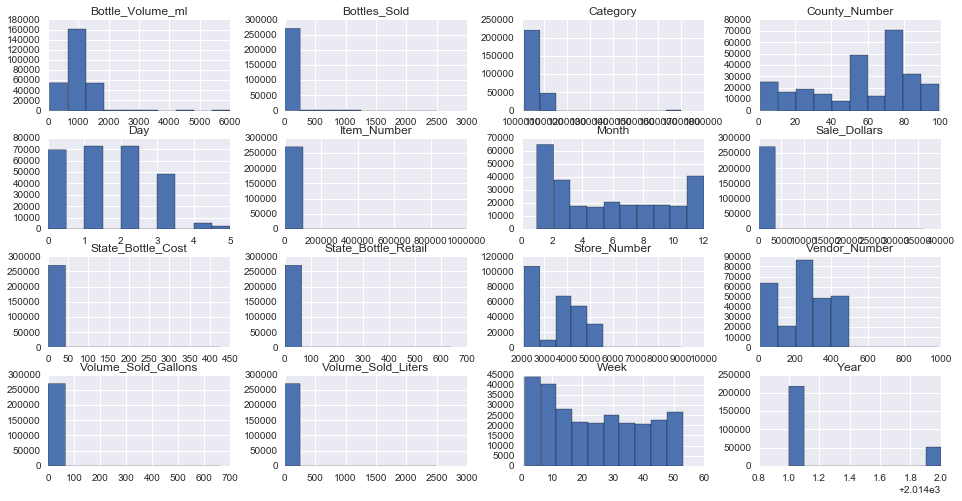

In [8]:
iowa.hist(figsize=(16,8))

In [ ]:
'''Surprising finds when graphing purchases by day, week, month. Wouldn't have guessed that most liquor sales
happen on Monday and Tuesday, very few on Friday and Saturday, and didn't know that liquor couldn't be sold on
Sunday. And those monthly trends? Why is so little liquor sold in January? New Year's Resolutions?'''

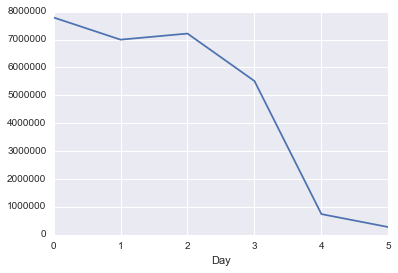

In [9]:
iowa.loc[iowa.Year == 2015].groupby('Day').Sale_Dollars.sum().sort_index().plot()


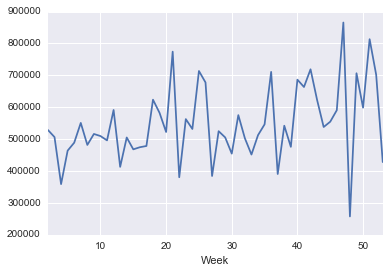

In [10]:
iowa.loc[iowa.Year == 2015].groupby('Week').Sale_Dollars.sum().sort_index().plot()


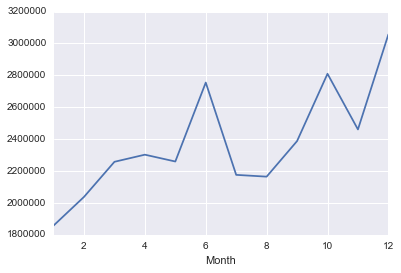

In [11]:
iowa.loc[iowa.Year == 2015].groupby('Month').Sale_Dollars.sum().sort_index().plot()

## Preparing 2015 Data

In [12]:
'''This is not immediately relevant, but worth keeing in mind. There were 91 stores with sales in 2015 but not in
2016, and 28 stores with sales in 2016 but not in 2015.'''

stores_with_no_sales_in_2016 = []
for x in iowa.loc[iowa.Year == 2015].Store_Number.unique():
    if x not in iowa.loc[iowa.Year == 2016].Store_Number.unique():
        stores_with_no_sales_in_2016.append(x)

In [13]:
stores_with_no_sales_in_2015 = []
for x in iowa.loc[iowa.Year == 2016].Store_Number.unique():
    if x not in iowa.loc[iowa.Year == 2015].Store_Number.unique():
        stores_with_no_sales_in_2015.append(x)

In [14]:
print len(stores_with_no_sales_in_2015)
print len(stores_with_no_sales_in_2016)

28
91


In [ ]:
'''Preparing a 2015 dataframe with features I thought worth pursuing: Q1 sales (required), average price of bottle 
sold (recommended), and the number of vendors each store uses, which I was pleased to find relevant. Perhaps it 
correlates with the size of the store (a larger store needs to stock more, carry a wider supply), and store size 
correlates with business. I will not be using bottles sold because bottles sold * average price of bottle 
equals sales, and Q1 sales are already a feature, thus -- multicollinearity. Likewise won't be looking at 
volume (in liters or gallons) because that's really just a repacking of bottles sold. Finally, location -- after
some chin-scratching, won't be doing it. All those dummy variables make the model more complex than I'd like -- and
besides, Joe says, there're more complex stats reasons to avoid it.'''


In [15]:
Q1_Sales = pd.DataFrame(iowa.loc[(iowa.Year == 2015) & (iowa.Month.isin([1, 2, 3]))].groupby('Store_Number').Sale_Dollars.sum())

In [16]:
NumOfVendors = pd.DataFrame(iowa.loc[iowa.Year == 2015].groupby('Store_Number').Vendor_Number.nunique())

In [17]:
AvgBottlePrice = pd.DataFrame(iowa.loc[iowa.Year == 2015].groupby('Store_Number').Sale_Dollars.sum() / iowa.loc[iowa.Year == 2015].groupby('Store_Number').Bottles_Sold.sum())

In [18]:
Total_Sales = pd.DataFrame(iowa.loc[iowa.Year == 2015].groupby('Store_Number').Sale_Dollars.sum())

In [19]:
iowa15 = pd.concat([Q1_Sales, NumOfVendors, AvgBottlePrice, Total_Sales], axis=1)
iowa15.head()

,Sale_Dollars,Vendor_Number,0,Sale_Dollars
Store_Number,,,,
2106,39287.29,32,14.114616,146326.22
2113,2833.25,23,13.875142,9310.22
2130,24272.57,29,15.056720,111871.43
2152,2003.46,16,13.474834,7721.08
2178,5856.41,25,12.616276,24324.18


In [20]:
# Cleaning up column names, getting rid of the index title.

cols = ['Q1_Sales', 'NumOfVendors', 'AvgBottlePrice', 'Annual_Sales']
iowa15.columns = cols
del iowa15.index.name
iowa15.head()

,Q1_Sales,NumOfVendors,AvgBottlePrice,Annual_Sales
2106,39287.29,32,14.114616,146326.22
2113,2833.25,23,13.875142,9310.22
2130,24272.57,29,15.056720,111871.43
2152,2003.46,16,13.474834,7721.08
2178,5856.41,25,12.616276,24324.18


In [21]:
iowa15.isnull().sum()

Q1_Sales          110
NumOfVendors        0
AvgBottlePrice      0
Annual_Sales        0
dtype: int64

In [22]:
'''Remember those 28 stores with no 2015 sales? Let's drop those rows, then fill in the rest of the missing values
with 0.'''

iowa15.dropna(how='all', inplace = True)
iowa15['Q1_Sales'].fillna(value=0, inplace=True)

## Feature Selection

In [ ]:
'''I picked this up method for testing feature effects on RMSE from a Sinan youtube lecture. 
I know this is a bit brute force, and there are better ways to go about it, but since I was 
only testing a small pool of features brute force was no burden. This also has the advantage 
of being easy to understand and read: I'm clear about what I'm inputting, I see the effect
each feature's removal has on RMSE.'''

In [23]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [24]:
def train_test_rsme(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [25]:
features = ['Q1_Sales', 'NumOfVendors', 'AvgBottlePrice']
X = iowa15[features]
y = iowa15.Annual_Sales
train_test_rsme(X, y)

11816.68909305164

In [26]:
features = ['Q1_Sales', 'NumOfVendors']
X = iowa15[features]
y = iowa15.Annual_Sales
train_test_rsme(X, y)

11832.706842682428

In [27]:
features = ['Q1_Sales', 'AvgBottlePrice']
X = iowa15[features]
y = iowa15.Annual_Sales
train_test_rsme(X, y)

12130.706742381897

In [28]:
features = ['Q1_Sales']
X = iowa15[features]
y = iowa15.Annual_Sales
train_test_rsme(X, y)

12196.885947690165

## Modeling

In [29]:
# Reminder -- the lowest RMSE score came from using all three features.

features = ['Q1_Sales', 'NumOfVendors', 'AvgBottlePrice']
X = iowa15[features]
y = iowa15.Annual_Sales

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)

In [32]:
y_pred = linreg.predict(X_test)

In [33]:
# This is my R^2 score. Equals model explained variation over total variation. Closer to one is better.

model.score(X_test, y_test)  

0.9605887319371017

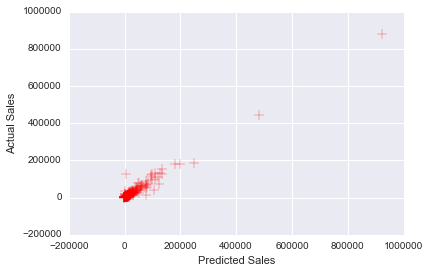

In [34]:
plt.scatter(y_pred, y_test, s=100, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.show()

## 2016 Prediction

In [35]:
Q1_Sales = pd.DataFrame(iowa.loc[iowa.Year == 2016].groupby('Store_Number').Sale_Dollars.sum())

In [36]:
NumOfVendors = pd.DataFrame(iowa.loc[iowa.Year == 2016].groupby('Store_Number').Vendor_Number.nunique())

In [37]:
AvgBottlePrice = pd.DataFrame(iowa.loc[iowa.Year == 2016].groupby('Store_Number').Sale_Dollars.sum() / iowa.loc[iowa.Year == 2016].groupby('Store_Number').Bottles_Sold.sum())

In [38]:
iowa16 = pd.concat([Q1_Sales, NumOfVendors, AvgBottlePrice], axis=1)
iowa16.head()

,Sale_Dollars,Vendor_Number,0
Store_Number,,,
2106,30523.75,22,13.749437
2113,2065.90,12,12.993082
2130,27856.11,25,16.139114
2152,1376.43,12,10.120809
2178,5588.50,20,11.642708


In [39]:
cols = ['Q1_Sales', 'NumOfVendors', 'AvgBottlePrice']
iowa16.columns = cols
del iowa16.index.name

In [40]:
iowa16.isnull().sum()

Q1_Sales          0
NumOfVendors      0
AvgBottlePrice    0
dtype: int64

In [41]:
iowa16.head()

,Q1_Sales,NumOfVendors,AvgBottlePrice
2106,30523.75,22,13.749437
2113,2065.90,12,12.993082
2130,27856.11,25,16.139114
2152,1376.43,12,10.120809
2178,5588.50,20,11.642708


In [42]:
features = ['Q1_Sales', 'NumOfVendors', 'AvgBottlePrice']
X = iowa16[features]

In [43]:
Predicted_Sales = linreg.predict(X)

In [44]:
iowa15.Annual_Sales.sum()

28527245.39000002

In [45]:
Predicted_Sales.sum()

28783574.713033527

In [ ]:
'''No projected increase or dropoff in sales. Like the rest of Iowa, flat.'''